In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
def kmer2seq(kmers):
    kmers_list = kmers.split(" ")
    bases = [kmer[0] for kmer in kmers_list[0:-1]]
    bases.append(kmers_list[-1])
    seq = "".join(bases)
    assert len(seq) == len(kmers_list) + len(kmers_list[0]) - 1
    return seq

def seq2kmer(seq, k):
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers

## 1 Seq2kmer

In [19]:
dna_data = pd.read_csv('../data/intermediate/dna_data.csv')
print(dna_data.shape)
dna_data = dna_data[dna_data['label'] == 'Space Flight']
dna_data = dna_data.sample[5000]
print(dna_data.shape)

(36000, 5)
(12000, 5)


In [20]:
dna_str = ''
for dna in list(dna_data['DNA']):
    dna_str += seq2kmer(dna, 6)
    dna_str += '\n'

In [21]:
file_path = '../data/intermediate/dna_str.txt'
with open(file_path, 'w') as file:
    file.write(dna_str)

In [22]:
dna_list = dna_str.split('\n')[:-1]
print(f'Number of DNAs: {len(dna_list)}')

Number of DNAs: 12000


/var/folders/jc/hlhpdxkj5_s73j6_9kx4sqp40000gn/T/ipykernel_76044/4160261352.py:7: RuntimeWarning: invalid value encountered in true_divide
  kde_values = np.exp(-(kde - np.mean(res))**2 / (2 * np.var(res))) / (np.sqrt(2 * np.pi * np.var(res)))


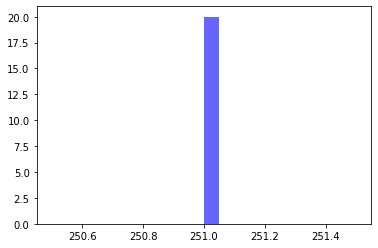

In [23]:
import matplotlib.pyplot as plt
import numpy as np

res = [len(kmer2seq(dna_str)) for dna_str in dna_list]
plt.hist(res, density=True, bins=20, alpha=0.6, color='blue')
kde = np.linspace(min(res), max(res), 1000)
kde_values = np.exp(-(kde - np.mean(res))**2 / (2 * np.var(res))) / (np.sqrt(2 * np.pi * np.var(res)))
plt.plot(kde, kde_values, color='red')
plt.show()

## 2 Sample data analysis

In [24]:
dna_all = ''
file_path = '../data/other/6_3k.txt'
with open(file_path, 'r') as file:
    for line in file:
        dna_all += line

In [25]:
dna_list = dna_all.split('\n')[:-1]
print(f'Number of DNAs: {len(dna_list)}')

Number of DNAs: 3000


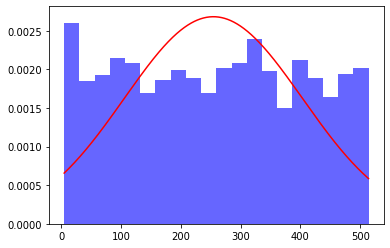

In [26]:
import matplotlib.pyplot as plt
import numpy as np

res = [len(kmer2seq(dna_str)) for dna_str in dna_list]
plt.hist(res, density=True, bins=20, alpha=0.6, color='blue')
kde = np.linspace(min(res), max(res), 1000)
kde_values = np.exp(-(kde - np.mean(res))**2 / (2 * np.var(res))) / (np.sqrt(2 * np.pi * np.var(res)))
plt.plot(kde, kde_values, color='red')
plt.show()